In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno

In [49]:
df = pd.read_csv("C:/Users/lhi30/Haein/2023/YBIGTA/DA/Project/Share/AptOnly/Seoul_Only.csv")

In [4]:
dfInfo = pd.read_csv("C:/Users/lhi30/Haein/2023/YBIGTA/DA/Project/Share/Data_Analysis/Reference.csv", 
                     index_col=0)

In [5]:
dfInfo

,kaptCode,Complex_Name
0,A13203302,쌍문삼성래미안
1,A13203303,쌍문한양1차
2,A13295201,브라운스톤쌍문
3,A13286107,쌍문한양6차
4,A13287801,쌍문현대3차
...,...,...
73,A14080901,용산푸르지오파크타운
74,A14024001,서빙고금호베스트빌
75,A14024002,서빙고신동아
76,A14082601,신동아아파트


In [50]:
df = df.iloc[:, 2:]
df

,kaptCode,bjdCode,Household_Num,Begin_Date,Heating_Method,House_Type,Elec_Con,Elev_Num,Park_Above,Park_Below
0,A13203302,1132010500,407.0,20020726.0,개별난방,아파트,단일계약,15.0,116.0,346.0
1,A13203303,1132010500,824.0,19861202.0,개별난방,아파트,단일계약,16.0,600.0,0.0
2,A13295201,1132010500,155.0,20061226.0,개별난방,아파트,단일계약,6.0,23.0,146.0
3,A13286107,1132010500,582.0,20020326.0,개별난방,아파트,단일계약,22.0,281.0,148.0
4,A13287801,1132010500,287.0,19950609.0,개별난방,아파트,단일계약,13.0,198.0,23.0
...,...,...,...,...,...,...,...,...,...,...
2623,A13681701,1129013900,315.0,19940624.0,개별난방,아파트,단일계약,7.0,62.0,179.0
2624,A13676101,1129013900,580.0,20090626.0,개별난방,아파트,종합계약,19.0,0.0,684.0
2625,A13676102,1129013900,80.0,20090626.0,개별난방,아파트,단일계약,2.0,0.0,56.0
2626,A13615002,1129013900,453.0,19990612.0,개별난방,아파트,단일계약,10.0,104.0,357.0


In [7]:
df.isnull().sum()

kaptCode           0
bjdCode            0
Household_Num      1
Begin_Date         5
Heating_Method     4
House_Type         0
Elec_Con          74
Elev_Num          93
Park_Above        68
Park_Below        69
dtype: int64

<AxesSubplot: >

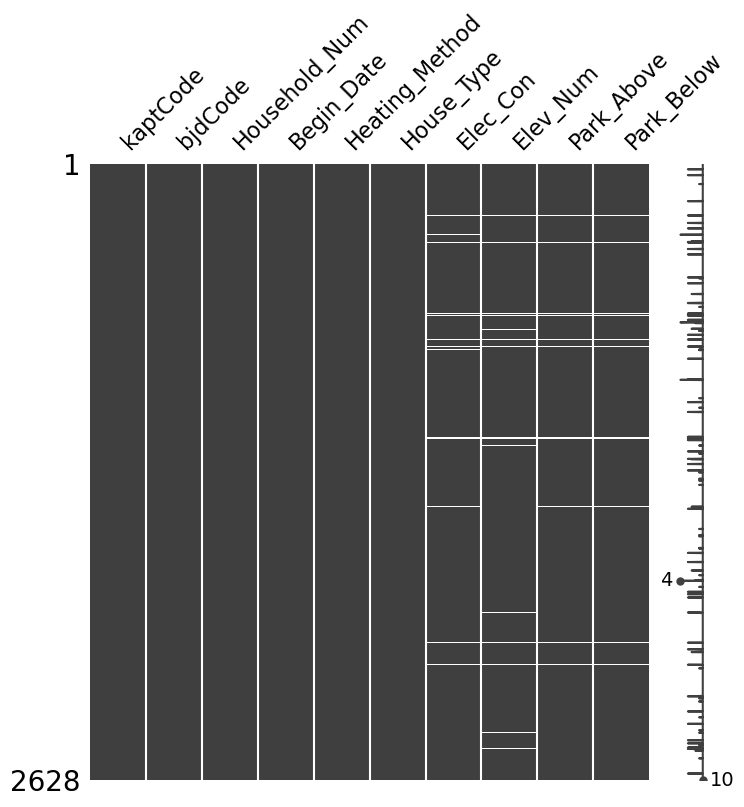

In [134]:
msno.matrix(df=df, figsize=(8, 8))

## Begin_Date

In [51]:
# 5 null values
np.where(df['Begin_Date'].isnull())[0]

array([ 301,  675,  920, 1777, 2292], dtype=int64)

In [52]:
#Drop the null values and change date values to datetime
Begin_Date = df['Begin_Date'].dropna()
Begin_Date = pd.to_datetime(Begin_Date, format = '%Y%m%d')
print(Begin_Date)

0      2002-07-26
1      1986-12-02
2      2006-12-26
3      2002-03-26
4      1995-06-09
          ...    
2623   1994-06-24
2624   2009-06-26
2625   2009-06-26
2626   1999-06-12
2627   2019-02-28
Name: Begin_Date, Length: 2623, dtype: datetime64[ns]


In [55]:
Begin_Date.groupby(Begin_Date.dt.year).count()

Begin_Date
1971      4
1974      7
1975      4
1976      5
1977      8
1978     10
1979      7
1980      4
1981      7
1982     10
1983     23
1984     28
1985     24
1986     33
1987     45
1988     63
1989     36
1990     30
1991     38
1992     73
1993     70
1994     67
1995     70
1996     81
1997    106
1998    109
1999    168
2000    137
2001    106
2002     83
2003    130
2004    131
2005     97
2006     74
2007     50
2008     69
2009     62
2010     56
2011     65
2012     28
2013     28
2014     45
2015     27
2016     42
2017     32
2018     42
2019     51
2020     37
2021     56
2022     35
2023     10
Name: Begin_Date, dtype: int64

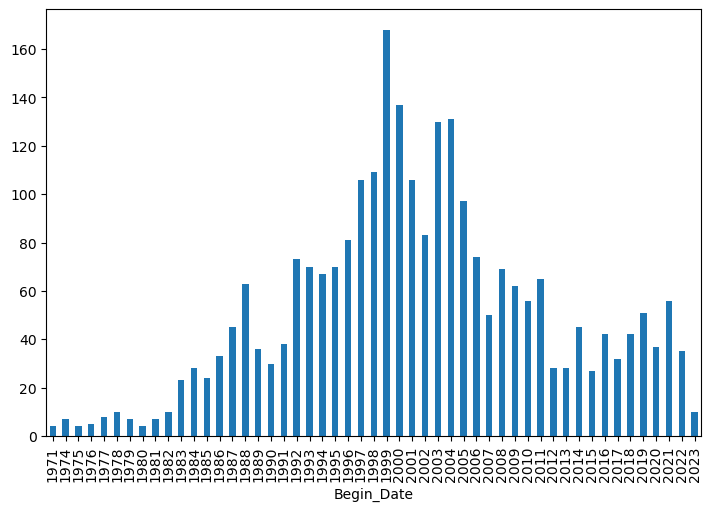

In [12]:
# distribution of years in Begin_Date
fig, axs = plt.subplots(figsize = (7,5), layout = 'constrained')
Begin_Date.groupby(Begin_Date.dt.year).count().plot(kind="bar")
plt.show()

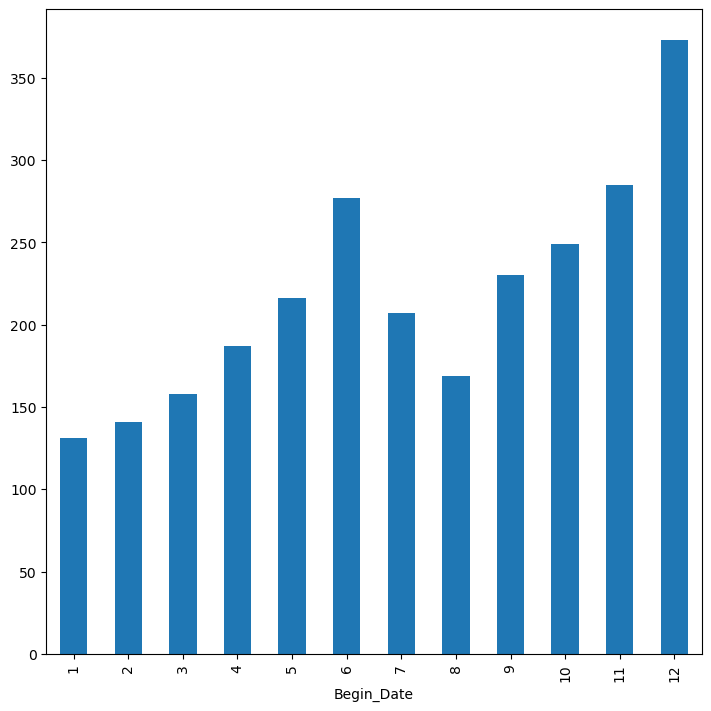

In [10]:
#Distribtion of months in Begin_Date(just for fun)
fig, axs = plt.subplots(figsize = (7,7), layout = 'constrained')
Begin_Date.groupby(Begin_Date.dt.month).count().plot(kind="bar")
plt.show()

## Household_Num

In [13]:
#1 null value
Household_Num = df['Household_Num']
print(np.where(Household_Num.isnull())[0])
display(Household_Num)

[2501]


0        407.0
1        824.0
2        155.0
3        582.0
4        287.0
         ...  
2623     315.0
2624     580.0
2625      80.0
2626     453.0
2627    1091.0
Name: Household_Num, Length: 2628, dtype: float64

In [14]:
Household_Num = Household_Num.dropna()
Household_Num = Household_Num.astype('int16')

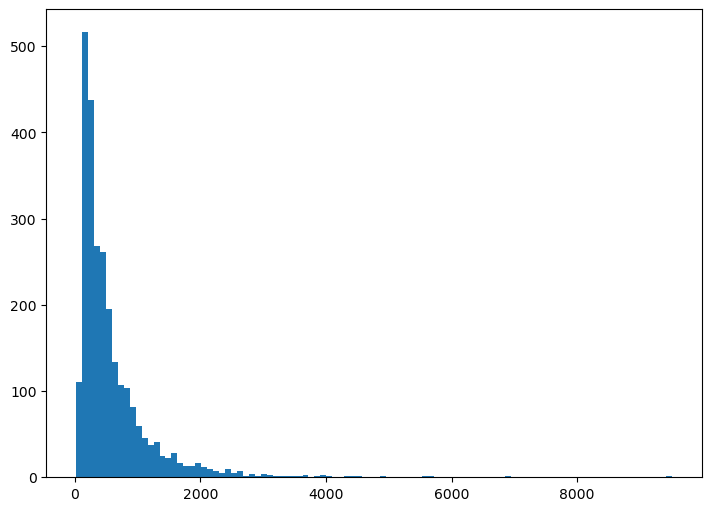

In [16]:
fig, ax= plt.subplots(figsize = (7,5), layout = 'constrained')
ax.hist(Household_Num, bins = 100)
plt.show()

In [142]:
Household_Num.describe()

count    2627.000000
mean      592.995051
std       640.433964
min        19.000000
25%       213.000000
50%       391.000000
75%       718.500000
max      9510.000000
Name: Household_Num, dtype: float64

In [17]:
def printApt (Column, df, dfInfo, maxmin = "max", ind= 0):
    if(maxmin == "max"):
        find = Column[Column == Column.max()].index[ind]
        print(df.loc[find])
        print(dfInfo[dfInfo['kaptCode'] == df.loc[find]['kaptCode']])
    elif(maxmin == "min"):
        find = Column[Column == Column.min()].index[ind]
        print(df.loc[find])
        print(dfInfo[dfInfo['kaptCode'] == df.loc[find]['kaptCode']])

In [20]:
printApt(Household_Num, df, dfInfo, maxmin='max')

kaptCode           A10025850
bjdCode           1171010700
Household_Num         9510.0
Begin_Date        20181228.0
Heating_Method          지역난방
House_Type               아파트
Elec_Con                종합계약
Elev_Num               384.0
Park_Above               0.0
Park_Below           12096.0
Name: 2100, dtype: object
     kaptCode Complex_Name
71  A10025850     헬리오시티아파트


## Heating_Method

In [21]:
# 4 null values
Heating_Method = df['Heating_Method']
print(np.where(Heating_Method.isnull())[0])
display(Heating_Method)

[ 301  675  920 1777]


0       개별난방
1       개별난방
2       개별난방
3       개별난방
4       개별난방
        ... 
2623    개별난방
2624    개별난방
2625    개별난방
2626    개별난방
2627    개별난방
Name: Heating_Method, Length: 2628, dtype: object

In [22]:
Heating_Method = Heating_Method.dropna()

In [23]:
int_HM = pd.factorize(Heating_Method)[0]
ind_HM = pd.factorize(Heating_Method)[1]
print(int_HM)
print(ind_HM)

[0 0 0 ... 0 0 0]
Index(['개별난방', '지역난방', '중앙난방', '개별난방+기타', '기타'], dtype='object')


In [24]:
count_int_HM = pd.Series(int_HM).value_counts()
count_int_HM

0    1814
1     686
2     109
3      13
4       2
dtype: int64

In [25]:
eng_ind_HM = ['Individual', 'Regional', 'Central', 'Indiv + Other', 'Other']

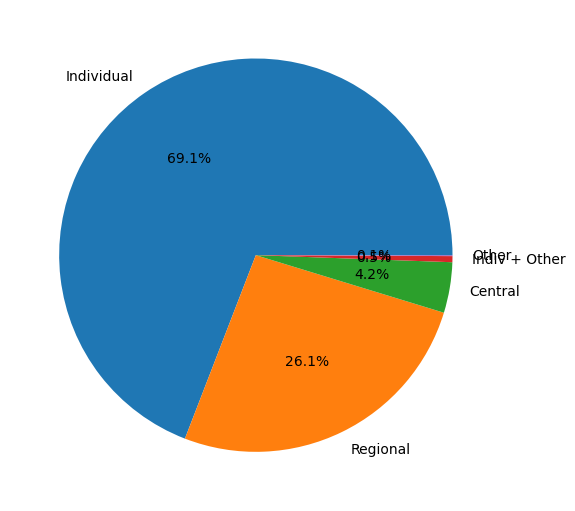

In [27]:
fig, ax= plt.subplots(figsize = (7,5), layout = 'constrained')
ax.pie(count_int_HM, labels=eng_ind_HM, autopct='%1.1f%%')
plt.show()

## Elev_Num; Elevator Number

In [28]:
Elev_Num = df['Elev_Num']
print(f"There are {Elev_Num.isnull().sum()} null values, and they are located at \n{np.where(Elev_Num.isnull())[0]}")

There are 93 null values, and they are located at 
[  22   47   85  158  219  251  274  301  332  334  362  385  483  487
  508  592  593  609  637  641  646  664  668  669  674  675  706  709
  711  728  748  778  830  918  920  998 1015 1039 1057 1163 1166 1171
 1177 1200 1225 1234 1257 1279 1306 1314 1315 1470 1556 1582 1587 1637
 1639 1658 1697 1733 1753 1777 1824 1834 1848 1912 1913 1914 2041 2069
 2080 2135 2136 2150 2269 2270 2278 2291 2334 2359 2387 2414 2425 2457
 2470 2473 2478 2488 2493 2494 2501 2534 2599]


In [29]:
Elev_Num = Elev_Num.dropna()
Elev_Num = Elev_Num.astype('int16')

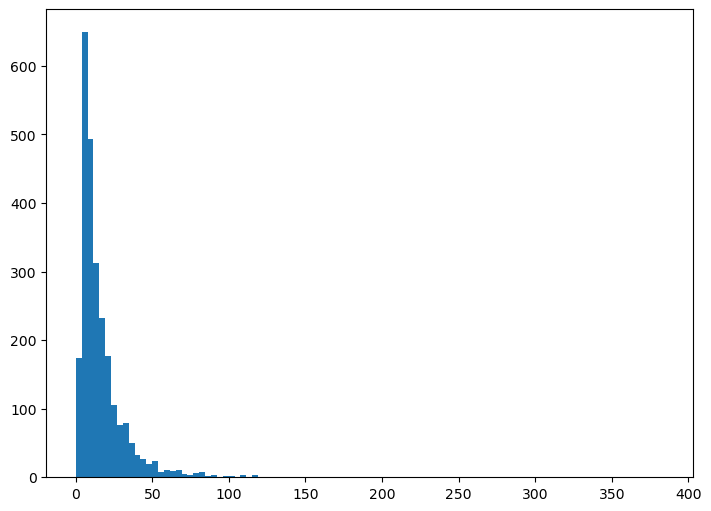

In [32]:
fig, ax= plt.subplots(figsize = (7,5), layout = 'constrained')
ax.hist(Elev_Num, bins = 100)
plt.show()

In [33]:
Elev_Num.describe()

count    2535.000000
mean       16.313609
std        17.998878
min         0.000000
25%         6.000000
50%        11.000000
75%        20.000000
max       384.000000
Name: Elev_Num, dtype: float64

In [37]:
printApt(Elev_Num, df, dfInfo, maxmin = 'max')

kaptCode           A10025850
bjdCode           1171010700
Household_Num         9510.0
Begin_Date        20181228.0
Heating_Method          지역난방
House_Type               아파트
Elec_Con                종합계약
Elev_Num               384.0
Park_Above               0.0
Park_Below           12096.0
Name: 2100, dtype: object
     kaptCode Complex_Name
71  A10025850     헬리오시티아파트


## Electricity Contract; Elec_Con

In [38]:
Elec_Con = df['Elec_Con']
print(f"There are {Elec_Con.isnull().sum()} null values, and they are located at \n{np.where(Elec_Con.isnull())[0]}")

There are 74 null values, and they are located at 
[  22   47  158  219  251  274  300  301  329  332  334  362  385  483
  508  554  592  593  637  641  646  664  669  674  675  702  728  748
  778  791  793  830  918  920 1015 1057 1163 1166 1171 1177 1225 1257
 1258 1259 1279 1306 1342 1368 1461 1470 1658 1697 1733 1774 1777 1803
 1824 1834 1848 1912 2041 2069 2081 2135 2269 2270 2334 2387 2457 2470
 2488 2491 2494 2599]


In [39]:
Elec_Con = Elec_Con.dropna()

In [40]:
int_EC = pd.factorize(Elec_Con)[0]
ind_EC = pd.factorize(Elec_Con)[1]
print(int_EC)
print(ind_EC)

[0 0 0 ... 0 0 1]
Index(['단일계약', '종합계약', '기타'], dtype='object')


In [41]:
count_int_EC = pd.Series(int_EC).value_counts()
count_int_EC

0    1635
1     838
2      81
dtype: int64

In [42]:
eng_ind_EC = ['Single', 'Comprehensive', 'Other']

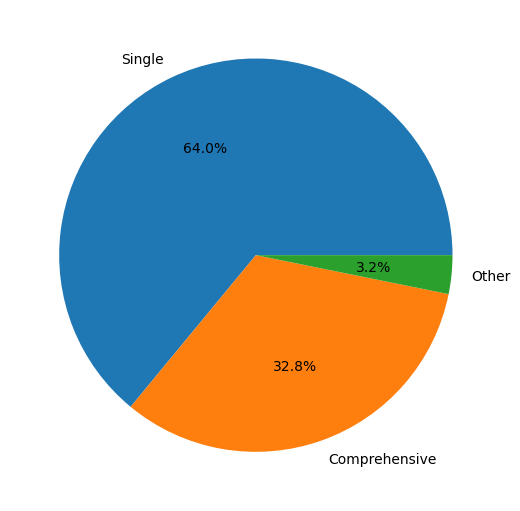

In [43]:
fig, ax= plt.subplots(figsize = (7,5), layout = 'constrained')
ax.pie(count_int_EC, labels=eng_ind_EC, autopct='%1.1f%%')
plt.show()

## Park_Above & Park_Below

In [44]:
Park_Above = df['Park_Above']
Park_Below = df['Park_Below']
print(f"There are {Park_Above.isnull().sum()} null values, and they are located at \n{np.where(Park_Above.isnull())[0]}")
print(f"There are {Park_Below.isnull().sum()} null values, and they are located at \n{np.where(Park_Below.isnull())[0]}")

There are 68 null values, and they are located at 
[  22   47  158  219  251  274  301  329  332  334  362  385  483  508
  554  592  593  637  641  646  664  669  674  675  678  702  728  748
  778  830  918  920 1015 1057 1163 1166 1171 1177 1225 1257 1258 1259
 1279 1306 1461 1470 1658 1697 1733 1777 1824 1834 1848 1912 2041 2069
 2081 2135 2269 2270 2334 2387 2457 2470 2488 2491 2494 2599]
There are 69 null values, and they are located at 
[  22   47  158  219  251  274  301  329  332  334  362  385  483  508
  554  592  593  637  641  646  664  669  674  675  678  702  728  748
  778  830  918  920 1015 1057 1163 1166 1171 1177 1225 1257 1258 1259
 1279 1306 1349 1461 1470 1658 1697 1774 1777 1824 1834 1848 1912 2041
 2069 2081 2135 2269 2270 2334 2387 2457 2470 2488 2491 2494 2599]


In [45]:
Park_Above = Park_Above.dropna().astype('int16')
Park_Below = Park_Below.dropna().astype('int16')
display(Park_Above)
display(Park_Below)

0       116
1       600
2        23
3       281
4       198
       ... 
2623     62
2624      0
2625      0
2626    104
2627      3
Name: Park_Above, Length: 2560, dtype: int16

0        346
1          0
2        146
3        148
4         23
        ... 
2623     179
2624     684
2625      56
2626     357
2627    1305
Name: Park_Below, Length: 2559, dtype: int16

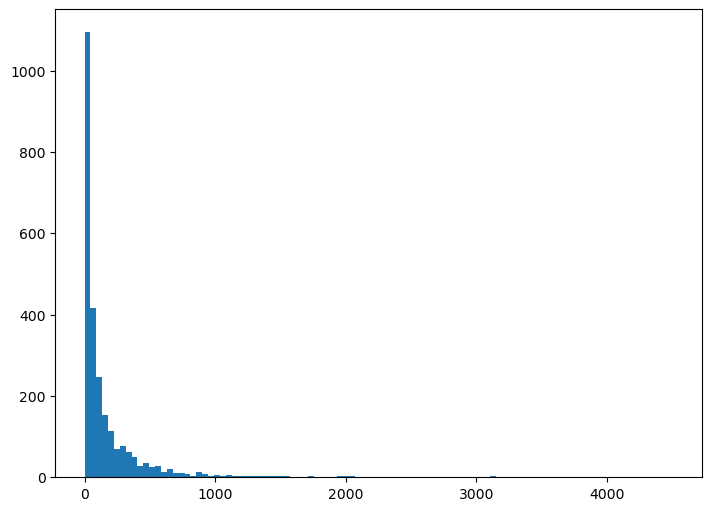

In [46]:
fig, ax= plt.subplots(figsize = (7,5), layout = 'constrained')
ax.hist(Park_Above, bins = 100)
plt.show()

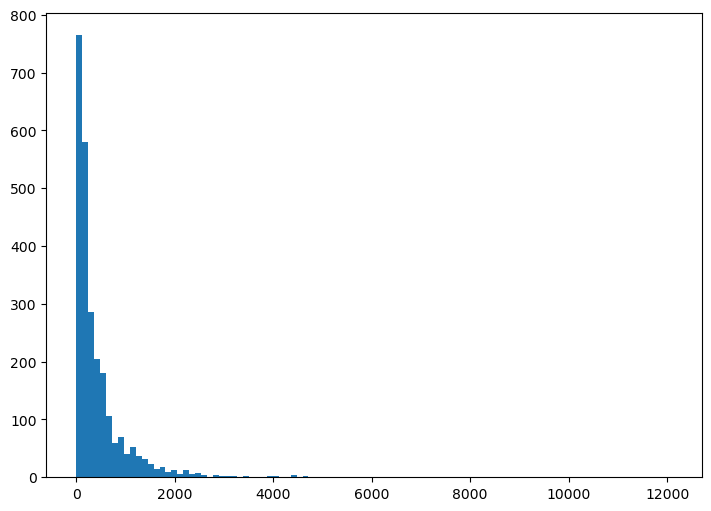

In [47]:
fig, ax= plt.subplots(figsize = (7,5), layout = 'constrained')
ax.hist(Park_Below, bins = 100)
plt.show()

In [166]:
Park_Above.describe()

count    2560.000000
mean      172.464063
std       338.973607
min         0.000000
25%        10.000000
50%        62.000000
75%       182.000000
max      4500.000000
Name: Park_Above, dtype: float64

In [167]:
Park_Below.describe()

count     2559.000000
mean       447.874170
std        713.871552
min          0.000000
25%         95.500000
50%        224.000000
75%        538.000000
max      12096.000000
Name: Park_Below, dtype: float64

In [168]:
printApt(Park_Above, df, dfInfo)

kaptCode           A13805002
bjdCode           1171011100
Household_Num         5540.0
Begin_Date        19880614.0
Heating_Method          지역난방
House_Type               아파트
Elec_Con                단일계약
Elev_Num               207.0
Park_Above            4500.0
Park_Below            3400.0
Name: 2133, dtype: object
      kaptCode Complex_Name
107  A13805002  올림픽선수기자촌아파트


In [169]:
printApt(Park_Below, df, dfInfo)

kaptCode           A10025850
bjdCode           1171010700
Household_Num         9510.0
Begin_Date        20181228.0
Heating_Method          지역난방
House_Type               아파트
Elec_Con                종합계약
Elev_Num               384.0
Park_Above               0.0
Park_Below           12096.0
Name: 2100, dtype: object
     kaptCode Complex_Name
71  A10025850     헬리오시티아파트
